In [1]:
from aestheval.data.datasets import AVA
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False) for split in SPLITS]

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


Using path:  /media/data-storage/datasets/ava/processed_train.json
Using path:  /media/data-storage/datasets/ava/processed_validation.json
Using path:  /media/data-storage/datasets/ava/processed_test.json


In [2]:
dataset = torch.utils.data.ConcatDataset(ava_dataset)

In [3]:
dataset[0]

(None,
 {'im_id': '953417',
  'im_score': 6.11290322581,
  'query': 1396,
  'im_name': '953417.jpg',
  'comments': ["6.1! Nice! You have mad macro skills! You'll notice I don't have any... because I suck at it.",
   'Frog with attitude; love it.  Reminds me of Jabba of Star Wars, lol. (voted earlier)',
   'he does look kind of lonely. Funky colors.',
   "No thanks, he is quite blue is'nt he, I like this.",
   'great shot!',
   'Very cute!',
   'Funny shot. Very nice perspective and lovely colors.'],
  'sentiment': {0: {'Negative': 0.3295336663722992,
    'Neutral': 0.2320113182067871,
    'Positive': 0.4384550452232361},
   1: {'Negative': 0.005600472446531057,
    'Neutral': 0.03543514013290405,
    'Positive': 0.9589643478393555},
   2: {'Negative': 0.5221530795097351,
    'Neutral': 0.4549880623817444,
    'Positive': 0.022858841344714165},
   3: {'Negative': 0.03750083968043327,
    'Neutral': 0.2324349284172058,
    'Positive': 0.7300642728805542},
   4: {'Negative': 0.01310765929

In [4]:
ncomments=[]
nwords = []
for im, d in dataset:
    # print(d['comments'])
    ncomments.append(len(d['comments']))
    nwords.extend([len(x.split()) for x in d['comments']])

In [5]:
sum(ncomments)

3354044

In [6]:
len(dataset)

253961

In [7]:
import pandas as pd
pd.Series(ncomments).describe()

count    253961.000000
mean         13.206925
std          13.129594
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
dtype: float64

<AxesSubplot:>

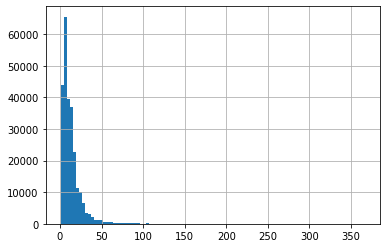

In [8]:
pd.Series(ncomments).hist(bins=100)

count    3.354044e+06
mean     1.570160e+01
std      1.701090e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.000000e+01
max      2.146000e+03
dtype: float64


<AxesSubplot:>

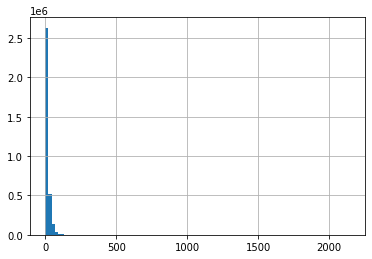

In [9]:
print(pd.Series(nwords).describe())
pd.Series(nwords).hist(bins=100)

In [10]:
gt_scores, pred_scores = zip(*[(data['im_score'], data['mean_score']) for _, data in tqdm(dataset)])



100%|██████████| 253961/253961 [00:00<00:00, 1533871.85it/s]


In [11]:
from scipy import stats
import sklearn.metrics as sm

pred_scores = [score*10 for score in pred_scores]
srcc = stats.spearmanr(gt_scores, pred_scores)
print("SRCC =", srcc)
mse = round(sm.mean_squared_error(gt_scores, pred_scores), 4)
print("MSE =", mse)
lcc = stats.pearsonr(gt_scores, pred_scores)
print("LCC =", lcc)

SRCC = SpearmanrResult(correlation=0.6335133407839579, pvalue=0.0)
MSE = 5.9397
LCC = (0.6424464694494703, 0.0)


In [12]:
df = pd.DataFrame({
    "Ground truth": gt_scores,
    "Predicted score": pred_scores
    })
df

,Ground truth,Predicted score
0,6.112903,7.937589
1,6.593750,8.828905
2,5.796875,9.539987
3,5.040984,9.905155
4,5.943548,9.696896
...,...,...
253956,4.439024,4.308670
253957,5.814050,7.860226
253958,5.344398,7.022425
253959,5.893701,9.159501


count    253961.000000
mean          0.741391
std           0.169991
min           0.025458
25%           0.637067
50%           0.772274
75%           0.874148
max           0.993714
dtype: float64


<AxesSubplot:ylabel='Frequency'>

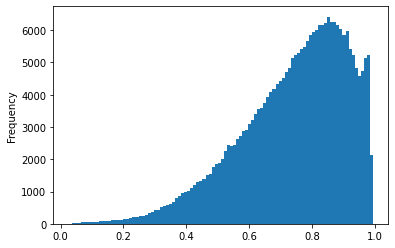

In [13]:
import pandas as pd
s = pd.Series([data['mean_score'] for _, data in dataset])
print(s.describe())
s.plot(kind='hist', bins=100)


In [ ]:
fig, ax =plt.subplots(1, 3, sharey=True) #sharey es para compartir el eje vertical porque estan todos en el mismo rango
sns.set_theme(style="ticks", color_codes=True, font_scale=3) 

g1=sns.barplot(x=0, y=1,  palette=sns.color_palette("pastel"), data=s, ax=ax[0])
g1.set(xlabel=None, ylabel=None,)
plt.setp(g1.get_xticklabels(), rotation=45) # para rotar las labels del eje x
g1.tick_params(labelsize=30)
g1.set_title('Shot Scale')

g2=sns.barplot(x=0, y=1,  palette=sns.color_palette("pastel"), data=composition_data, ax=ax[1])
g2.set(xlabel=None, ylabel=None)
plt.setp(g2.get_xticklabels(), rotation=45)
g2.tick_params(labelsize=30)
g2.set_title('Composition')

g3=sns.barplot(x=0, y=1,  palette=sns.color_palette("pastel"), data=semantic_data, ax=ax[2])
g3.set(xlabel=None, ylabel=None)
plt.setp(g3.get_xticklabels(), rotation=45)
g3.tick_params(labelsize=30)
g3.set_title('Content')

plt.subplots_adjust(left=0.05, bottom=0.2,right=0.95) # manual para que me ajuste bien el plot al texto
fig.show()

**NOTE**: Sentiment score scale is [0,1] and ava original score scale is [0,10]

count    253961.000000
mean          5.385840
std           0.732089
min           1.808989
25%           4.913858
50%           5.390476
75%           5.868932
max           8.600000
dtype: float64


<AxesSubplot:ylabel='Frequency'>

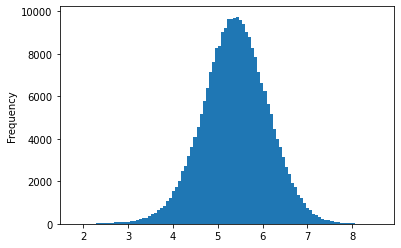

In [22]:
# original ava score
s = pd.Series([data['im_score'] for _, data in dataset])
print(s.describe())
s.plot(kind='hist', bins=100)


count    253961.000000
mean          0.243858
std           0.110952
min           0.000000
25%           0.180615
50%           0.261050
75%           0.320977
max           0.679175
dtype: float64


<AxesSubplot:ylabel='Frequency'>

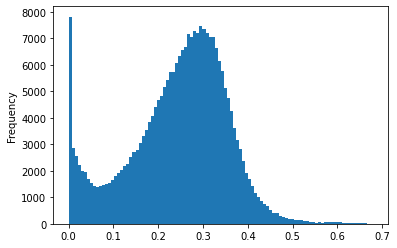

In [24]:
# stdev of sentiment score

s = pd.Series([data['stdev_score'] for _, data in dataset])
print(s.describe())
s.plot(kind='hist', bins=100)


count    253961.000000
mean         13.206925
std          13.129594
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
dtype: float64


<AxesSubplot:ylabel='Frequency'>

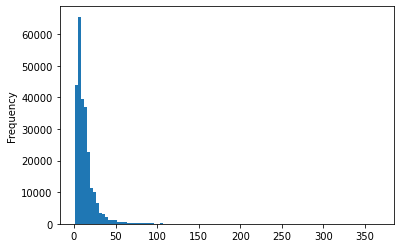

In [26]:
# Number of sentiment scores
s = pd.Series([data['number_of_scores'] for _, data in dataset])
print(s.describe())
s.plot(kind='hist', bins=100)



# AVA test set shouldn't be used as test set 

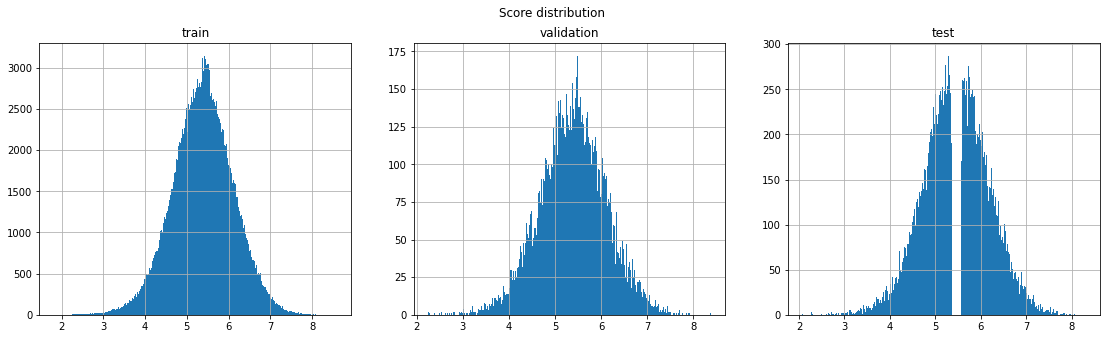

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 5))
i = 131
for k, v in zip(['train', 'validation', 'test'], ava_dataset):
    plt.subplot(i)
    i+=1
    scores = [data['im_score'] for im, data in v]
    plt.hist(scores, 300)
    plt.title(k)
    plt.grid(True)
plt.suptitle('Score distribution')
plt.show()

In [64]:
ava = pd.read_csv('../aestheval/data/ava/AVA_data_official_test.csv')
ava['num_scorers'] = ava[['1','2','3','4','5','6','7','8','9','10']].sum(axis=1)
ava.head()

,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id,MOS,image_name,MLS,set,width,height,num_scorers
0,0,0,0,5,32,50,23,10,3,1,22,0,1396,6.112903,953417.jpg,6,training,781.0,699.0,124
1,0,3,2,3,13,40,35,21,8,3,20,53,1396,6.593750,953777.jpg,6,training,550.0,800.0,128
2,0,2,3,9,35,50,20,5,2,2,0,0,1396,5.796875,953756.jpg,6,training,800.0,594.0,128
3,0,1,7,26,56,23,6,1,0,2,0,0,1396,5.040984,954195.jpg,5,training,587.0,674.0,122
4,0,1,4,5,33,50,17,9,3,2,21,28,1396,5.943548,953903.jpg,6,training,800.0,533.0,124


In [65]:
ava.describe()

,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id,MOS,MLS,width,height,num_scorers
count,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000,255502.000000
mean,2.693470,5.702237,13.959574,34.882956,60.612109,47.782033,24.573941,11.900361,5.018830,3.011581,11.315563,16.157862,652.126594,5.383304,5.241575,606.980090,537.387206,210.137091
std,6.106235,7.505140,13.080868,22.038484,22.799079,20.418634,16.251027,10.824319,6.076987,4.535615,10.511550,16.263798,367.627966,0.731299,0.726625,110.434642,115.157571,61.507492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.808989,1.000000,120.000000,90.000000,78.000000
25%,0.000000,1.000000,5.000000,18.000000,45.000000,34.000000,12.000000,4.000000,1.000000,1.000000,1.000000,0.000000,351.000000,4.911215,5.000000,529.000000,448.000000,164.000000
50%,1.000000,3.000000,10.000000,31.000000,59.000000,47.000000,22.000000,9.000000,3.000000,2.000000,12.000000,17.000000,620.000000,5.386647,5.000000,640.000000,514.000000,201.000000
75%,3.000000,7.000000,19.000000,48.000000,74.000000,59.000000,34.000000,16.000000,7.000000,4.000000,18.000000,27.000000,944.000000,5.865613,6.000000,640.000000,640.000000,247.000000
max,238.000000,85.000000,131.000000,208.000000,242.000000,204.000000,159.000000,126.000000,104.000000,123.000000,65.000000,65.000000,1408.000000,8.600000,10.000000,800.000000,800.000000,549.000000


In [35]:
# Number of images per set
ava.groupby('set').size()

set
test           19928
training      223795
validation     11779
dtype: int64

In [73]:
# Number of images per challenge -> There's a great variance!
print(ava.groupby('challenge_id').size())
print("Stats:")
ava.groupby('challenge_id').size().describe()

challenge_id
2        9
4       20
5       45
6       71
7       75
        ..
1404    86
1405    90
1406    88
1407    62
1408    74
Length: 1398, dtype: int64
Stats:


count    1398.000000
mean      182.762518
std       115.787049
min         7.000000
25%       103.000000
50%       152.500000
75%       233.000000
max      1108.000000
dtype: float64

There are 1398 different challenges, with a mean of 182 images per challenge (although really high std). The median challenge has 152 images. 

In [38]:
splits = ava.groupby(['set', 'challenge_id']).size()
splits

set         challenge_id
test        8               1
            9               3
            11              1
            12              4
            13              2
                           ..
validation  1404            8
            1405            9
            1406            2
            1407            4
            1408            1
Length: 4148, dtype: int64

In [39]:
# Number of challenges where each set split have images from. It's quite balanced
splits.groupby('set').count()

set
test          1371
training      1398
validation    1379
dtype: int64

In [66]:
ava.sort_values(by='challenge_id').corr()

,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id,MOS,MLS,width,height,num_scorers
1,1.000000,0.762965,0.613644,0.383908,-0.040863,-0.325509,-0.259695,-0.199504,-0.153385,-0.084652,-0.071551,-0.055718,-0.134624,-0.556582,-0.511586,-0.100141,-0.100326,0.212108
2,0.762965,1.000000,0.857820,0.658204,0.129126,-0.381244,-0.343195,-0.280856,-0.231256,-0.151381,-0.095619,-0.085875,-0.279604,-0.708156,-0.594710,-0.155020,-0.162679,0.363224
3,0.613644,0.857820,1.000000,0.817533,0.308110,-0.365276,-0.380117,-0.326872,-0.281099,-0.196415,-0.093261,-0.090663,-0.352579,-0.761912,-0.625970,-0.186440,-0.196469,0.463924
4,0.383908,0.658204,0.817533,1.000000,0.577144,-0.302898,-0.440479,-0.413935,-0.377134,-0.286398,-0.063950,-0.075583,-0.330541,-0.779394,-0.649747,-0.206487,-0.203714,0.516370
5,-0.040863,0.129126,0.308110,0.577144,1.000000,0.290181,-0.086668,-0.204286,-0.261034,-0.245758,0.009625,-0.025841,-0.201492,-0.349175,-0.318050,-0.131903,-0.115449,0.648259
6,-0.325509,-0.381244,-0.365276,-0.302898,0.290181,1.000000,0.745589,0.569522,0.412562,0.277296,0.055636,0.049007,-0.039517,0.580744,0.486711,0.023660,0.050232,0.532913
7,-0.259695,-0.343195,-0.380117,-0.440479,-0.086668,0.745589,1.000000,0.852926,0.740327,0.594701,0.032498,0.047232,-0.111236,0.761431,0.626936,0.021314,0.043449,0.440375
8,-0.199504,-0.280856,-0.326872,-0.413935,-0.204286,0.569522,0.852926,1.000000,0.850391,0.744059,0.020298,0.041745,-0.145882,0.743514,0.612437,0.005818,0.020609,0.381658
9,-0.153385,-0.231256,-0.281099,-0.377134,-0.261034,0.412562,0.740327,0.850391,1.000000,0.810044,0.015791,0.039071,-0.123994,0.686377,0.572684,0.007433,0.016757,0.305636
10,-0.084652,-0.151381,-0.196415,-0.286398,-0.245758,0.277296,0.594701,0.744059,0.810044,1.000000,0.008328,0.034385,-0.133154,0.579501,0.493123,-0.007248,0.007029,0.271537


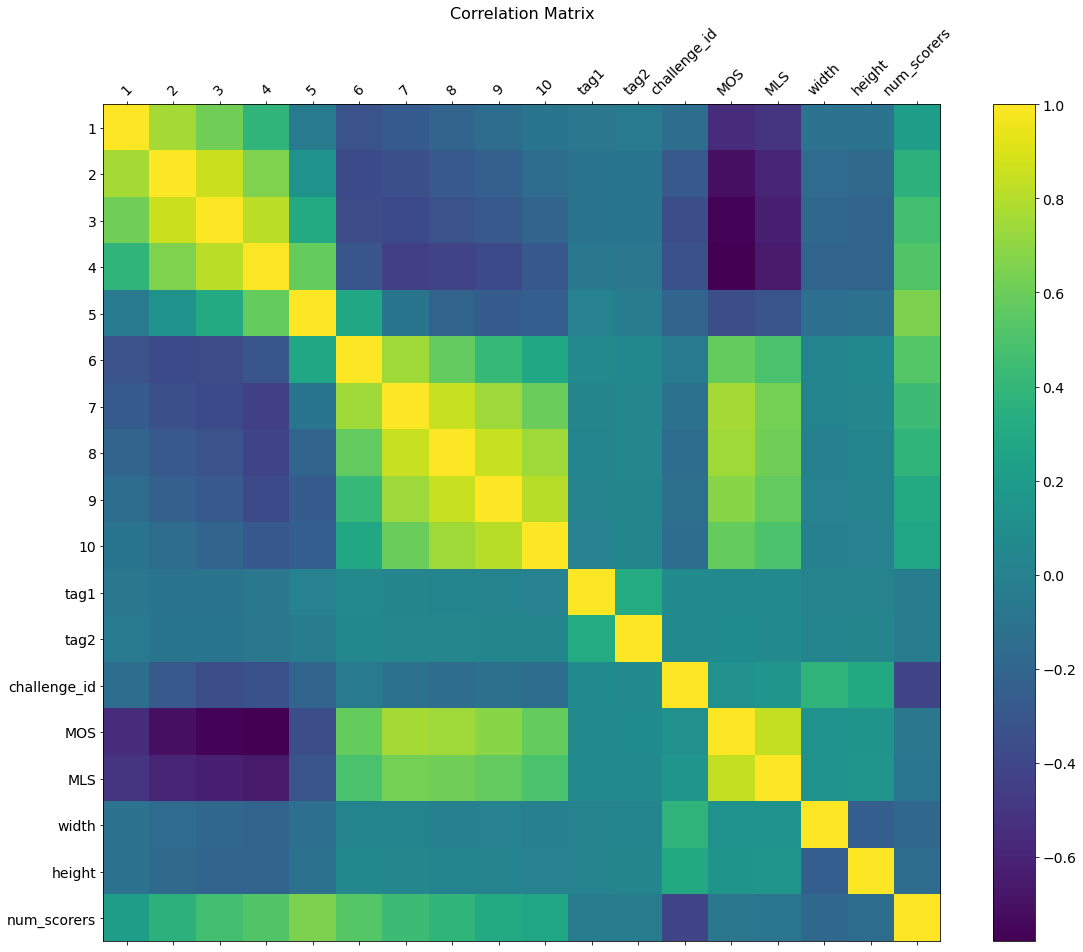

In [67]:
f = plt.figure(figsize=(19, 15))
plt.matshow(ava.sort_values(by='challenge_id').corr(), fignum=f.number)
plt.xticks(range(ava.select_dtypes(['number']).shape[1]), ava.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(ava.select_dtypes(['number']).shape[1]), ava.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='challenge_id', ylabel='num_scorers'>

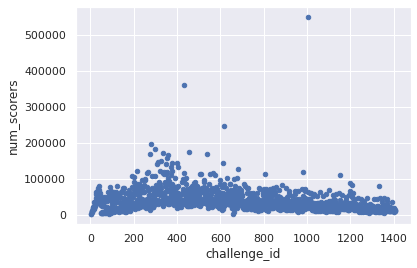

In [88]:
gava = ava.groupby('challenge_id').sum().reset_index()
gava.plot(x='challenge_id', y='num_scorers', kind='scatter')

There's a quite strong negative correlation (40%) between challenge id (time) and num_scorers, meaning there are less active users with time:

<AxesSubplot:xlabel='challenge_id', ylabel='num_scorers'>

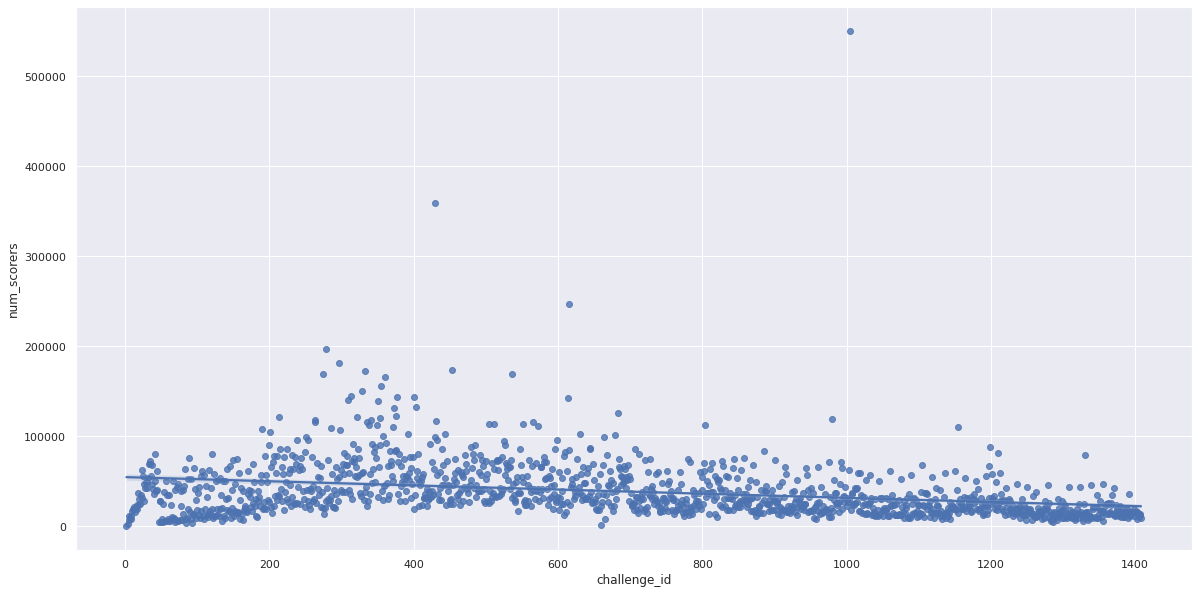

In [89]:
import seaborn as sns
from matplotlib import pyplot
sns.set_theme(color_codes=True)

fig, ax = pyplot.subplots(figsize=(20,10))
sns.regplot(x=gava.challenge_id, y=gava.num_scorers, fit_reg=True)

There's also a quite strong positive correlation between teh resolution of the images and challenge id (time):

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='challenge_id', ylabel='height'>

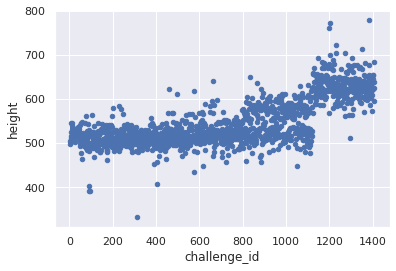

In [92]:
gava = ava.groupby('challenge_id').mean().reset_index()
gava.plot(x='challenge_id', y='height', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='challenge_id', ylabel='width'>

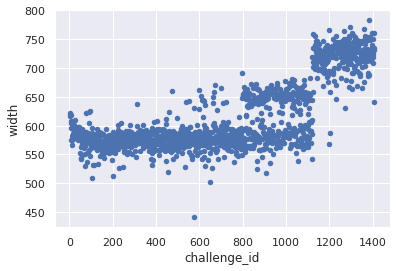

In [93]:
gava = ava.groupby('challenge_id').mean().reset_index()
gava.plot(x='challenge_id', y='width', kind='scatter')

Although apparently this increase in resolution has not increased that much the MOS:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='challenge_id', ylabel='MOS'>

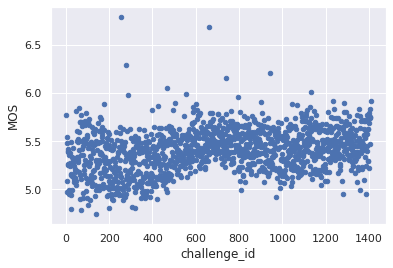

In [94]:
gava = ava.groupby('challenge_id').mean().reset_index()
gava.plot(x='challenge_id', y='MOS', kind='scatter')

The challenge id = 1408 (max challenge id) is from May 2011: https://www.dpchallenge.com/challenge_results.php?CHALLENGE_ID=1408

The latest challenge (June 22) has the id 3410, meaning the ava dataset could be easily multiplied by two.